In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix
## Artificial Neural Network libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [2]:
## import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('UK_tourism2.csv')
data

,Title,OS visitors Earnings: Mn £ (NSA),OS visitors Earnings: Mn £ (SA),OS visitors: # in Thousands (NSA),OS visitors: # in Thousands(SA),UK visitors Expenditure: Mn £ (NSA),UK visitors Expenditure: Mn £ (SA),UK visitors: # in Thousands (NSA),UK visitors: # in Thousands (SA)
0,1980 JAN,NaN,NaN,739,NaN,NaN,NaN,823,NaN
1,1980 FEB,NaN,NaN,602,NaN,NaN,NaN,780,NaN
2,1980 MAR,NaN,NaN,740,NaN,NaN,NaN,1058,NaN
3,1980 APR,NaN,NaN,1028,NaN,NaN,NaN,1397,NaN
4,1980 MAY,NaN,NaN,1088,NaN,NaN,NaN,1438,NaN
...,...,...,...,...,...,...,...,...,...
518,2023 MAR,NaN,NaN,2598,NaN,NaN,NaN,5205,NaN
519,2023 APR,NaN,NaN,3118,NaN,NaN,NaN,7331,NaN
520,2023 MAY,NaN,NaN,3292,NaN,NaN,NaN,7516,NaN
521,2023 JUN,NaN,NaN,3472,NaN,NaN,NaN,8525,NaN


In [4]:
# Define a function to convert the 'Title' column to datetime
def convert_to_datetime(date_string):
    return pd.to_datetime(date_string, format='%Y %b')

# Apply the function to the entire 'Title' column
data['Title'] = data['Title'].apply(convert_to_datetime)

# Display the result
data


,Title,OS visitors Earnings: Mn £ (NSA),OS visitors Earnings: Mn £ (SA),OS visitors: # in Thousands (NSA),OS visitors: # in Thousands(SA),UK visitors Expenditure: Mn £ (NSA),UK visitors Expenditure: Mn £ (SA),UK visitors: # in Thousands (NSA),UK visitors: # in Thousands (SA)
0,1980-01-01,NaN,NaN,739,NaN,NaN,NaN,823,NaN
1,1980-02-01,NaN,NaN,602,NaN,NaN,NaN,780,NaN
2,1980-03-01,NaN,NaN,740,NaN,NaN,NaN,1058,NaN
3,1980-04-01,NaN,NaN,1028,NaN,NaN,NaN,1397,NaN
4,1980-05-01,NaN,NaN,1088,NaN,NaN,NaN,1438,NaN
...,...,...,...,...,...,...,...,...,...
518,2023-03-01,NaN,NaN,2598,NaN,NaN,NaN,5205,NaN
519,2023-04-01,NaN,NaN,3118,NaN,NaN,NaN,7331,NaN
520,2023-05-01,NaN,NaN,3292,NaN,NaN,NaN,7516,NaN
521,2023-06-01,NaN,NaN,3472,NaN,NaN,NaN,8525,NaN


In [5]:
data.drop(columns= data.iloc[:,1:3], inplace=True)
data.drop(columns= data.iloc[:,3:5], inplace=True)
data

,Title,OS visitors: # in Thousands (NSA),OS visitors: # in Thousands(SA),UK visitors: # in Thousands (NSA),UK visitors: # in Thousands (SA)
0,1980-01-01,739,NaN,823,NaN
1,1980-02-01,602,NaN,780,NaN
2,1980-03-01,740,NaN,1058,NaN
3,1980-04-01,1028,NaN,1397,NaN
4,1980-05-01,1088,NaN,1438,NaN
...,...,...,...,...,...
518,2023-03-01,2598,NaN,5205,NaN
519,2023-04-01,3118,NaN,7331,NaN
520,2023-05-01,3292,NaN,7516,NaN
521,2023-06-01,3472,NaN,8525,NaN


## Drop the (SA) Columns containing many NaN values

In [6]:
data.drop(columns= data[['OS visitors: # in Thousands(SA)']], inplace=True)
data.drop(columns= data[['UK visitors: # in Thousands (SA)']], inplace=True)
data

,Title,OS visitors: # in Thousands (NSA),UK visitors: # in Thousands (NSA)
0,1980-01-01,739,823
1,1980-02-01,602,780
2,1980-03-01,740,1058
3,1980-04-01,1028,1397
4,1980-05-01,1088,1438
...,...,...,...
518,2023-03-01,2598,5205
519,2023-04-01,3118,7331
520,2023-05-01,3292,7516
521,2023-06-01,3472,8525


array([[<Axes: title={'center': 'Title'}>,
        <Axes: title={'center': 'OS visitors: # in Thousands (NSA)'}>],
       [<Axes: title={'center': 'UK visitors: # in Thousands (NSA)'}>,
        <Axes: >]], dtype=object)

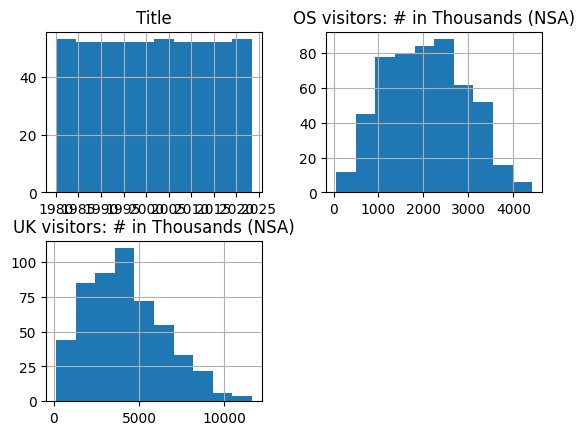

In [7]:
data.hist()

In [8]:
# Extract the month from the 'Date' column and create a new 'Month' column
data['Month'] = data['Title'].dt.month
data['Year'] = data['Title'].dt.year
# Display the result
data


,Title,OS visitors: # in Thousands (NSA),UK visitors: # in Thousands (NSA),Month,Year
0,1980-01-01,739,823,1,1980
1,1980-02-01,602,780,2,1980
2,1980-03-01,740,1058,3,1980
3,1980-04-01,1028,1397,4,1980
4,1980-05-01,1088,1438,5,1980
...,...,...,...,...,...
518,2023-03-01,2598,5205,3,2023
519,2023-04-01,3118,7331,4,2023
520,2023-05-01,3292,7516,5,2023
521,2023-06-01,3472,8525,6,2023


## Exploratory Data analysis (Monthly)

In [9]:
import pandas as pd

# Assuming you have an existing dataset in a DataFrame named 'original_dataset'
# For demonstration purposes, let's say the column you're interested in is named 'target_column'

# Create a new dataset where the 'target_column' equals 1
JAN_dataset = data[data['Month'] == 1]

# Now 'new_dataset' contains only the rows where 'target_column' is equal to 1


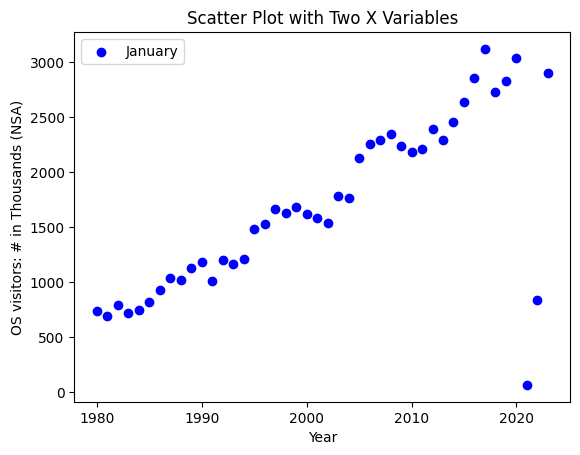

<Figure size 1800x1000 with 0 Axes>

In [10]:
# Sample data
x = JAN_dataset['Year']
y = JAN_dataset['OS visitors: # in Thousands (NSA)']

# Create scatter plot
plt.scatter(x, y, c='blue', marker='o', label='January')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('Scatter Plot with Two X Variables')

# Add legend
plt.legend()
plt.figure(figsize=(18,10))
# Show the plot
plt.show()

In [11]:
FEB_dataset = data[data['Month'] == 2]

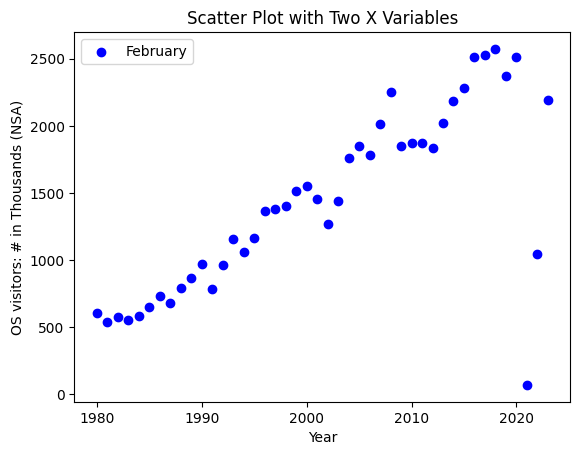

<Figure size 1800x1000 with 0 Axes>

In [12]:
# Sample data
x = FEB_dataset['Year']
y = FEB_dataset['OS visitors: # in Thousands (NSA)']

# Create scatter plot
plt.scatter(x, y, c='blue', marker='o', label='February')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('Scatter Plot with Two X Variables')

# Add legend
plt.legend()
plt.figure(figsize=(18,10))
# Show the plot
plt.show()

In [13]:
MAR_dataset = data[data['Month'] == 3]

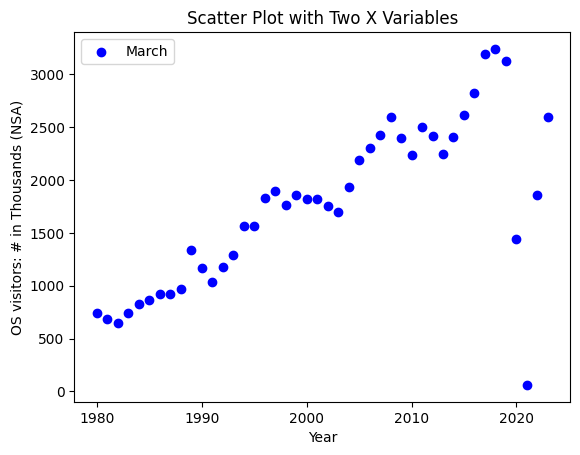

<Figure size 1800x1000 with 0 Axes>

In [14]:
# Sample data
x = MAR_dataset['Year']
y = MAR_dataset['OS visitors: # in Thousands (NSA)']

# Create scatter plot
plt.scatter(x, y, c='blue', marker='o', label='March')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('Scatter Plot with Two X Variables')

# Add legend
plt.legend()
plt.figure(figsize=(18,10))
# Show the plot
plt.show()

In [15]:
APR_dataset = data[data['Month'] == 4]

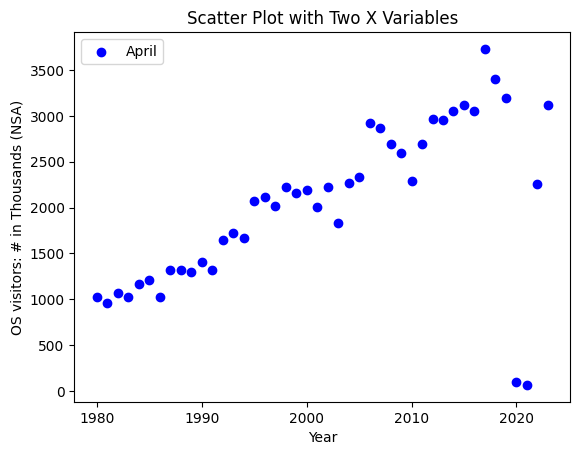

<Figure size 1800x1000 with 0 Axes>

In [16]:
# Sample data
x = APR_dataset['Year']
y = APR_dataset['OS visitors: # in Thousands (NSA)']

# Create scatter plot
plt.scatter(x, y, c='blue', marker='o', label='April')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('Scatter Plot with Two X Variables')

# Add legend
plt.legend()
plt.figure(figsize=(18,10))
# Show the plot
plt.show()

In [17]:
MAY_dataset = data[data['Month'] == 5]

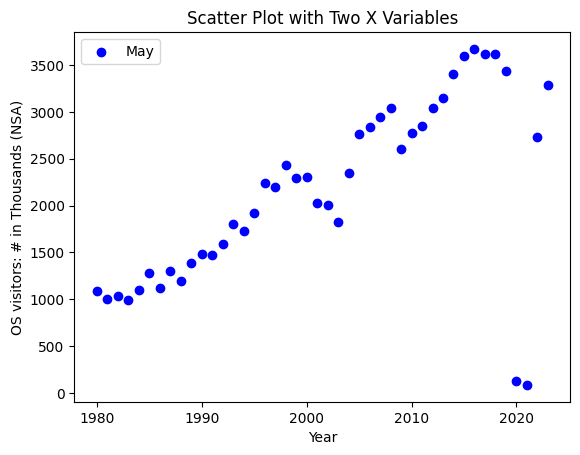

<Figure size 1800x1000 with 0 Axes>

In [18]:
# Sample data
x = MAY_dataset['Year']
y = MAY_dataset['OS visitors: # in Thousands (NSA)']

# Create scatter plot
plt.scatter(x, y, c='blue', marker='o', label='May')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('Scatter Plot with Two X Variables')

# Add legend
plt.legend()
plt.figure(figsize=(18,10))
# Show the plot
plt.show()

In [19]:
JUN_dataset = data[data['Month'] == 6]

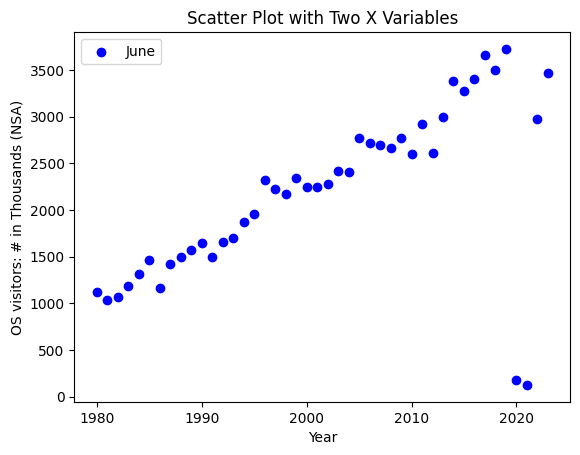

<Figure size 1800x1000 with 0 Axes>

In [20]:
# Sample data
x = JUN_dataset['Year']
y = JUN_dataset['OS visitors: # in Thousands (NSA)']

# Create scatter plot
plt.scatter(x, y, c='blue', marker='o', label='June')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('Scatter Plot with Two X Variables')

# Add legend
plt.legend()
plt.figure(figsize=(18,10))
# Show the plot
plt.show()

In [21]:
JUL_dataset = data[data['Month'] == 7]

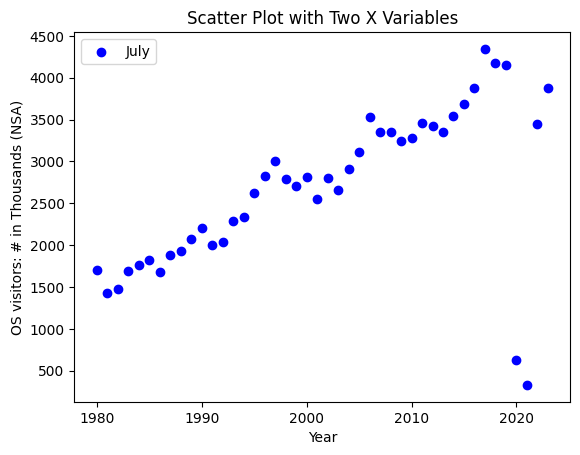

<Figure size 1800x1000 with 0 Axes>

In [22]:
# Sample data
x = JUL_dataset['Year']
y = JUL_dataset['OS visitors: # in Thousands (NSA)']

# Create scatter plot
plt.scatter(x, y, c='blue', marker='o', label='July')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('Scatter Plot with Two X Variables')

# Add legend
plt.legend()
plt.figure(figsize=(18,10))
# Show the plot
plt.show()

In [23]:
AUG_dataset = data[data['Month'] == 8]

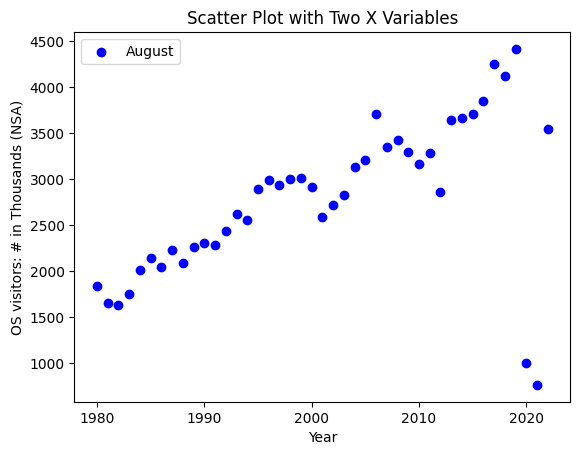

<Figure size 1800x1000 with 0 Axes>

In [24]:
# Sample data
x = AUG_dataset['Year']
y = AUG_dataset['OS visitors: # in Thousands (NSA)']

# Create scatter plot
plt.scatter(x, y, c='blue', marker='o', label='August')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('Scatter Plot with Two X Variables')

# Add legend
plt.legend()
plt.figure(figsize=(18,10))
# Show the plot
plt.show()

In [25]:
SEP_dataset = data[data['Month'] == 9]

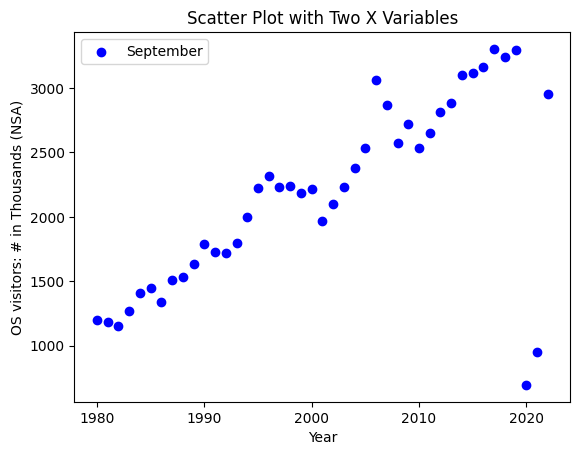

<Figure size 1800x1000 with 0 Axes>

In [26]:
# Sample data
x = SEP_dataset['Year']
y = SEP_dataset['OS visitors: # in Thousands (NSA)']

# Create scatter plot
plt.scatter(x, y, c='blue', marker='o', label='September')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('Scatter Plot with Two X Variables')

# Add legend
plt.legend()
plt.figure(figsize=(18,10))
# Show the plot
plt.show()

In [27]:
OCT_dataset = data[data['Month'] == 10]

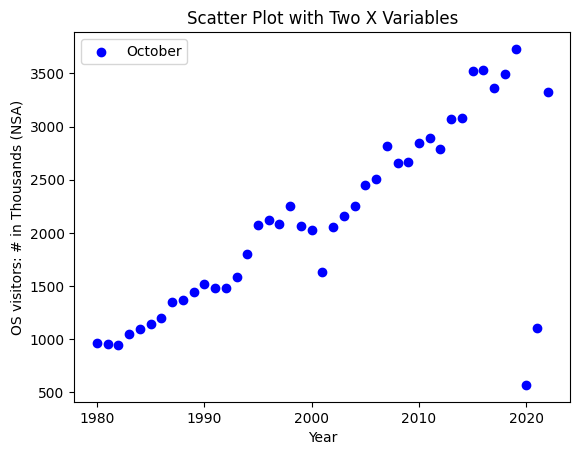

<Figure size 1800x1000 with 0 Axes>

In [28]:
# Sample data
x = OCT_dataset['Year']
y = OCT_dataset['OS visitors: # in Thousands (NSA)']

# Create scatter plot
plt.scatter(x, y, c='blue', marker='o', label='October')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('Scatter Plot with Two X Variables')

# Add legend
plt.legend()
plt.figure(figsize=(18,10))
# Show the plot
plt.show()

In [29]:
NOV_dataset = data[data['Month'] == 11]

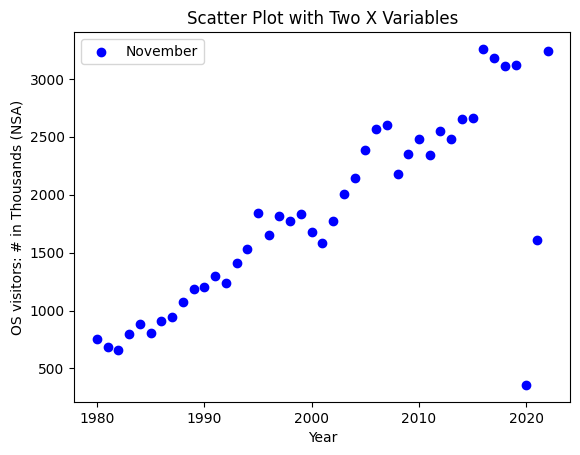

<Figure size 1800x1000 with 0 Axes>

In [30]:
# Sample data
x = NOV_dataset['Year']
y = NOV_dataset['OS visitors: # in Thousands (NSA)']

# Create scatter plot
plt.scatter(x, y, c='blue', marker='o', label='November')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('Scatter Plot with Two X Variables')

# Add legend
plt.legend()
plt.figure(figsize=(18,10))
# Show the plot
plt.show()

In [31]:
DEC_dataset = data[data['Month'] == 12]

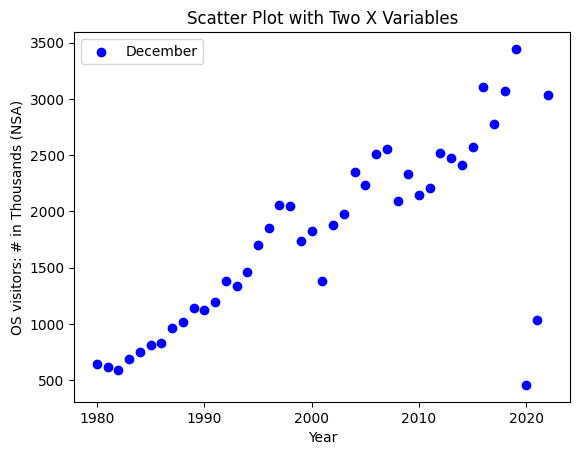

<Figure size 1800x1000 with 0 Axes>

In [32]:
# Sample data
x = DEC_dataset['Year']
y = DEC_dataset['OS visitors: # in Thousands (NSA)']

# Create scatter plot
plt.scatter(x, y, c='blue', marker='o', label='December')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('Scatter Plot with Two X Variables')

# Add legend
plt.legend()
plt.figure(figsize=(18,10))
# Show the plot
plt.show()

## Exploratory Data Analysis (Yearly)

# 1986

In [33]:
year_1986 = data[data['Year'] == 1986]

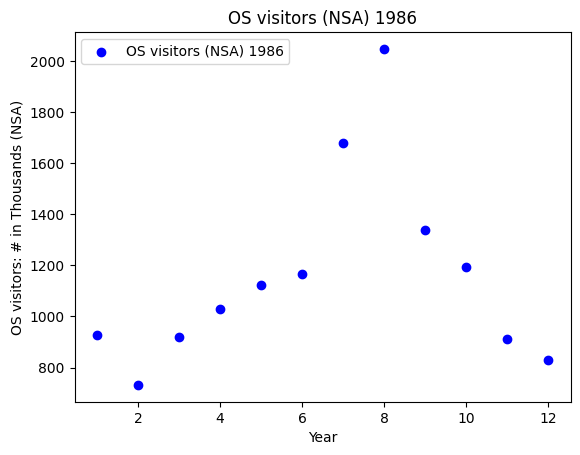

<Figure size 1800x1000 with 0 Axes>

In [34]:
# Sample data
x = year_1986['Month']
y = year_1986['OS visitors: # in Thousands (NSA)']

# Create scatter plot
plt.scatter(x, y, c='blue', marker='o', label='OS visitors (NSA) 1986')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('OS visitors (NSA) 1986')

# Add legend
plt.legend()
plt.figure(figsize=(18,10))
# Show the plot
plt.show()

# 1987

In [35]:
year_1987 = data[data['Year'] == 1987]

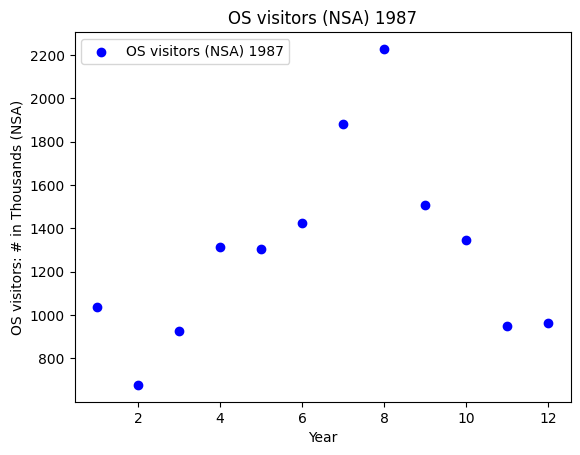

<Figure size 1800x1000 with 0 Axes>

In [36]:
# Sample data
x = year_1987['Month']
y = year_1987['OS visitors: # in Thousands (NSA)']
plt.scatter(x, y, c='blue', marker='o', label='OS visitors (NSA) 1987')

plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('OS visitors (NSA) 1987')
plt.legend()
plt.figure(figsize=(18,10))
plt.show()

# 1988

In [37]:
year_1988 = data[data['Year'] == 1988]

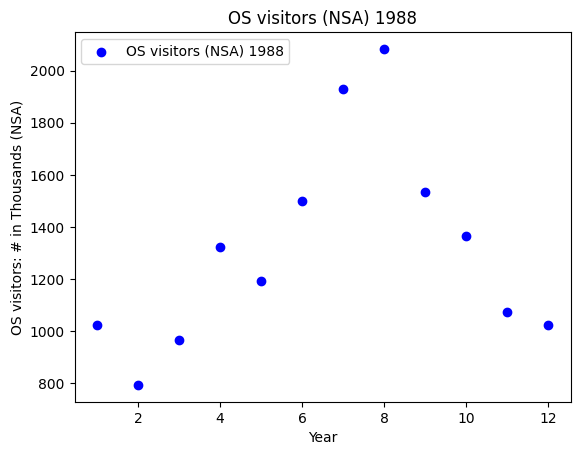

<Figure size 1800x1000 with 0 Axes>

In [38]:
# Sample data
x = year_1988['Month']
y = year_1988['OS visitors: # in Thousands (NSA)']
plt.scatter(x, y, c='blue', marker='o', label='OS visitors (NSA) 1988')

plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('OS visitors (NSA) 1988')
plt.legend()
plt.figure(figsize=(18,10))
plt.show()

# 1989

In [39]:
year_2019 = data[data['Year'] == 2019]

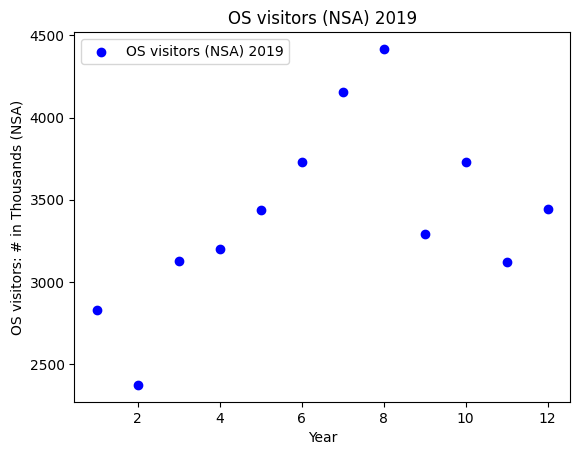

In [40]:
# Sample data
x = year_2019['Month']
y = year_2019['OS visitors: # in Thousands (NSA)']
plt.scatter(x, y, c='blue', marker='o', label='OS visitors (NSA) 2019')

plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('OS visitors (NSA) 2019')
plt.legend()
plt.show()

# 1990

In [41]:
year_2020 = data[data['Year'] == 2020]

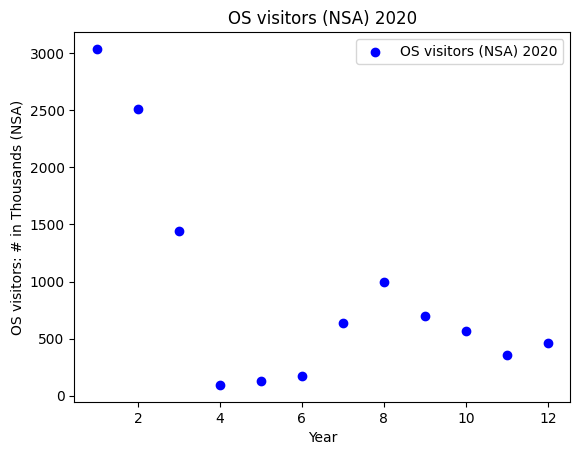

<Figure size 1800x1000 with 0 Axes>

In [42]:
# Sample data
x = year_2020['Month']
y = year_2020['OS visitors: # in Thousands (NSA)']
plt.scatter(x, y, c='blue', marker='o', label='OS visitors (NSA) 2020')

plt.xlabel('Year')
plt.ylabel('OS visitors: # in Thousands (NSA)')
plt.title('OS visitors (NSA) 2020')
plt.legend()
plt.figure(figsize=(18,10))
plt.show()

# 1991

In [43]:
year_1991 = data[data['Year'] == 1991]

# 1992

In [44]:
year_1992 = data[data['Year'] == 1992]

# 1993

In [45]:
year_1993 = data[data['Year'] == 1993]

# 1994

## Q1 Comparison 1986-2020

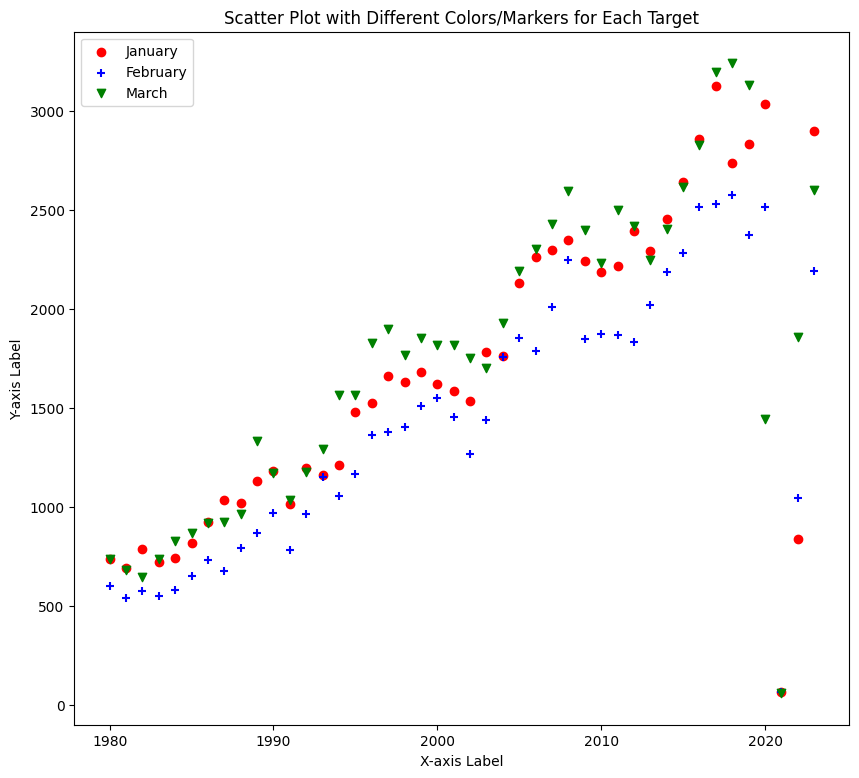

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have an existing dataset in a DataFrame named 'original_dataset'
# For demonstration purposes, let's say the column you're interested in is named 'target_column'

# Create a new dataset for each target value
targets = [1, 2, 3]  # Add all twelve target values
new_datasets = [data[data['Month'] == target] for target in targets]

# Plot each dataset with a different color and marker
colors = ['red', 'blue', 'green']
markers = ['o', '+', 'v']
linestyle = ['-', '-', '-']
plt.figure(figsize=(10, 9))

targets = ['January', 'February', 'March'] #, 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


for i, dataset in enumerate(new_datasets):
    plt.scatter(dataset['Year'], dataset['OS visitors: # in Thousands (NSA)'], color=colors[i], linestyle=linestyle[i], marker=markers[i], label=f'{targets[i]}')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot with Different Colors/Markers for Each Target')
plt.legend()
plt.show()


# Q2 Comparison 1986-2020

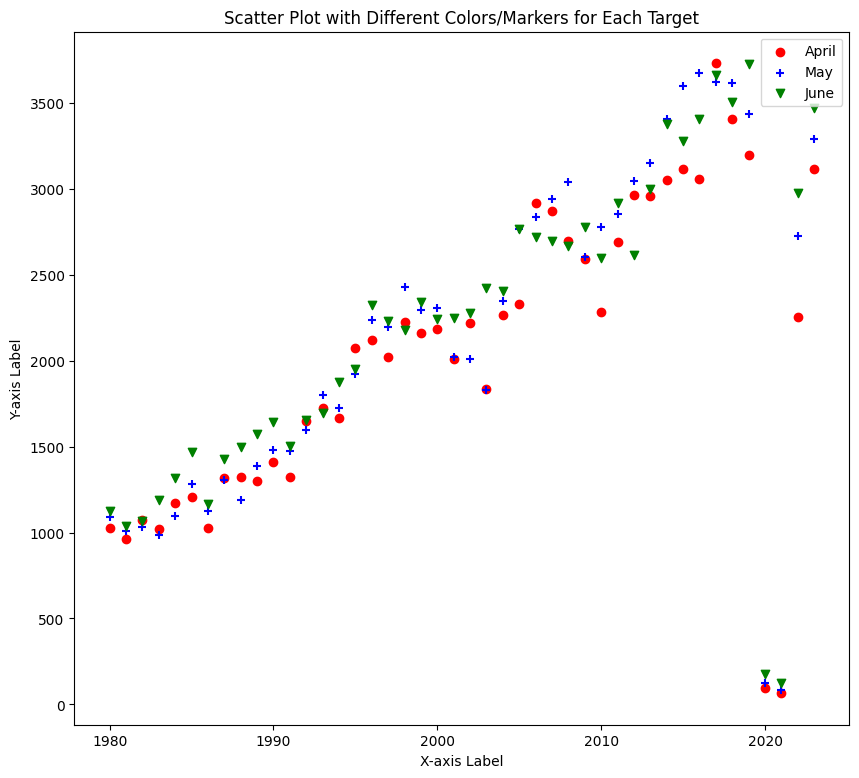

In [47]:
# Create a new dataset for each target value
targets = [4, 5, 6]  # Add all twelve target values
new_datasets = [data[data['Month'] == target] for target in targets]

# Plot each dataset with a different color and marker
colors = ['red', 'blue', 'green']
markers = ['o', '+', 'v']
linestyle = ['-', '-', '-']
plt.figure(figsize=(10, 9))

targets = ['April', 'May', 'June'] #, 'July', 'August', 'September', 'October', 'November', 'December']

for i, dataset in enumerate(new_datasets):
    plt.scatter(dataset['Year'], dataset['OS visitors: # in Thousands (NSA)'], color=colors[i], linestyle=linestyle[i], marker=markers[i], label=f'{targets[i]}')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot with Different Colors/Markers for Each Target')
plt.legend()
plt.show()

## Q3 Comparison 1986-2020

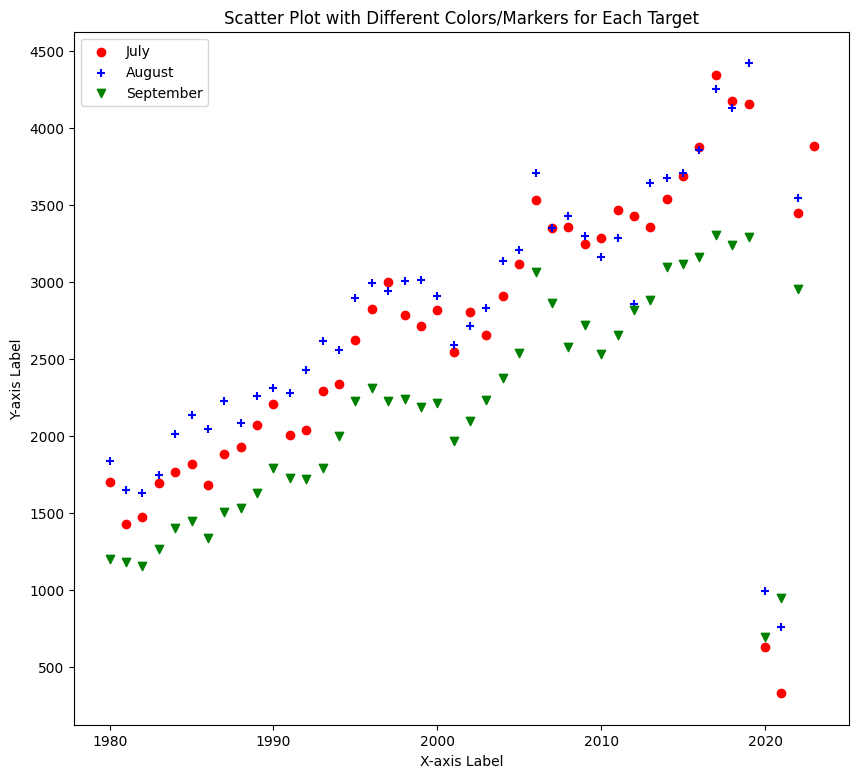

In [48]:
# Create a new dataset for each target value
targets = [7, 8, 9]  # Add all twelve target values
new_datasets = [data[data['Month'] == target] for target in targets]

# Plot each dataset with a different color and marker
colors = ['red', 'blue', 'green']
markers = ['o', '+', 'v']
linestyle = ['-', '-', '-']
plt.figure(figsize=(10, 9))

targets = ['July', 'August', 'September'] #, 'October', 'November', 'December']

for i, dataset in enumerate(new_datasets):
    plt.scatter(dataset['Year'], dataset['OS visitors: # in Thousands (NSA)'], color=colors[i], linestyle=linestyle[i], marker=markers[i], label=f'{targets[i]}')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot with Different Colors/Markers for Each Target')
plt.legend()
plt.show()

## Q4 Comparison 1986-2020

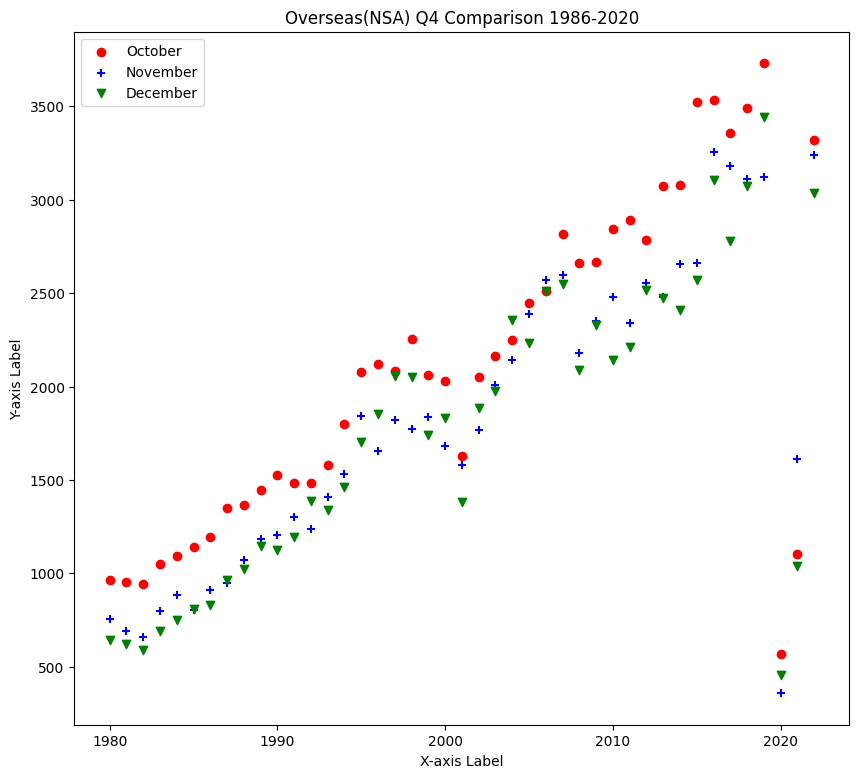

In [49]:
# Create a new dataset for each target value
targets = [10, 11, 12]  # Add all twelve target values
new_datasets = [data[data['Month'] == target] for target in targets]

# Plot each dataset with a different color and marker
colors = ['red', 'blue', 'green']
markers = ['o', '+', 'v']
linestyle = ['-', '-', '-']
plt.figure(figsize=(10, 9))

targets = ['October', 'November', 'December']

for i, dataset in enumerate(new_datasets):
    plt.scatter(dataset['Year'], dataset['OS visitors: # in Thousands (NSA)'], color=colors[i], linestyle=linestyle[i], marker=markers[i], label=f'{targets[i]}')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Overseas(NSA) Q4 Comparison 1986-2020')
plt.legend()
plt.show()

In [50]:
## we want to drop the rows anomalies ( Covid-19 years ) as it may massively affect the predictions

In [51]:
df = data.drop(columns='Title')
df

,OS visitors: # in Thousands (NSA),UK visitors: # in Thousands (NSA),Month,Year
0,739,823,1,1980
1,602,780,2,1980
2,740,1058,3,1980
3,1028,1397,4,1980
4,1088,1438,5,1980
...,...,...,...,...
518,2598,5205,3,2023
519,3118,7331,4,2023
520,3292,7516,5,2023
521,3472,8525,6,2023


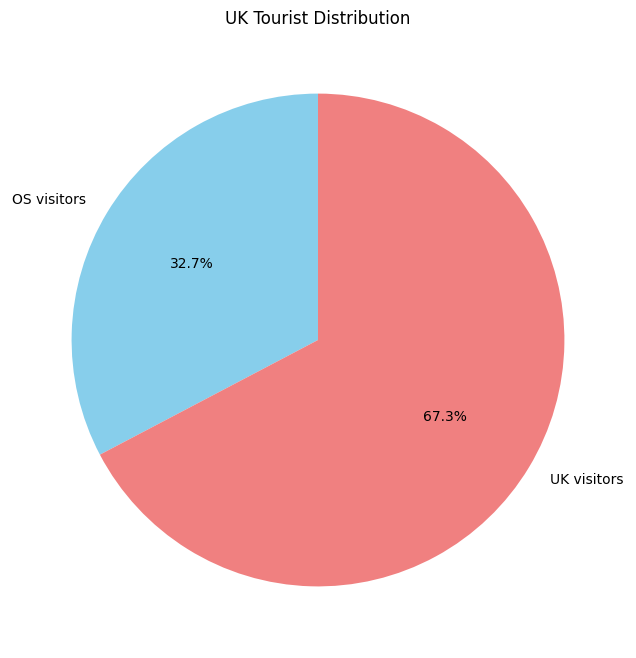

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('OS_UK_Month_Year.csv')

# Calculate total visitors for each category
total_os_visitors = df['OS visitors: # in Thousands (NSA)'].sum()
total_uk_visitors = df['UK visitors: # in Thousands (NSA)'].sum()

# Calculate the percentage of visitors for each category
os_percentage = total_os_visitors / (total_os_visitors + total_uk_visitors) * 100
uk_percentage = total_uk_visitors / (total_os_visitors + total_uk_visitors) * 100

# Data for the pie chart
labels = ['OS visitors', 'UK visitors']
sizes = [os_percentage, uk_percentage]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('UK Tourist Distribution')
plt.show()


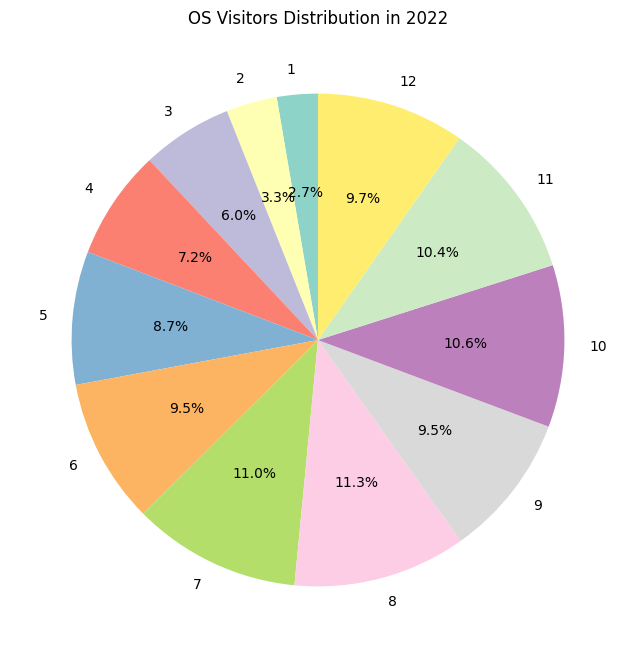

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the year 2022
df_2022 = df[df['Year'] == 2022]

# Calculate total OS visitors for the year 2022
total_os_visitors_2022 = df_2022['OS visitors: # in Thousands (NSA)'].sum()

# Calculate the percentage of OS visitors for each month
df_2022['OS visitors percentage'] = (
    df_2022['OS visitors: # in Thousands (NSA)'] / total_os_visitors_2022 * 100
)

# Data for the pie chart
labels = df_2022['Month']
sizes = df_2022['OS visitors percentage']

# Generate 12 distinct colors
colors = plt.cm.Set3(range(12))

# Plotting the pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('OS Visitors Distribution in 2022')
plt.show()


In [ ]:
# df = df.drop(df.index[:220])
# df = df.drop(df.index[-4:])
df

,OS visitors: # in Thousands (NSA),UK visitors: # in Thousands (NSA),Month,Year
0,739,823,1,1980
1,602,780,2,1980
2,740,1058,3,1980
3,1028,1397,4,1980
4,1088,1438,5,1980
...,...,...,...,...
518,2598,5205,3,2023
519,3118,7331,4,2023
520,3292,7516,5,2023
521,3472,8525,6,2023


In [ ]:
df.to_csv('OS_UK_Month_Year.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame with multiple columns including 'PredictorColumn' and 'TargetColumn1', 'TargetColumn2', etc.
# X contains the predictor column, and y contains the target columns.
X = df[['Month', 'Year']]
y = df[['OS visitors: # in Thousands (NSA)']] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# scaling
## standard scaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

# Choose a model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.4882550223037762


In [ ]:
pd.DataFrame(y_pred)

,0
0,-1.034024
1,1.032090
2,0.164202
3,0.512986
4,-0.222910
...,...
100,-0.571694
101,-0.025282
102,-0.146972
103,0.928845


In [ ]:
y_pred.shape

(105, 1)

In [ ]:
y_test.shape

(105, 1)

In [ ]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,OS visitors: # in Thousands (NSA),UK visitors: # in Thousands (NSA),Month,Year
OS visitors: # in Thousands (NSA),1.000000,0.927459,0.134215,0.615962
UK visitors: # in Thousands (NSA),0.927459,1.000000,0.130073,0.636361
Month,0.134215,0.130073,1.000000,-0.016737
Year,0.615962,0.636361,-0.016737,1.000000


<Axes: >

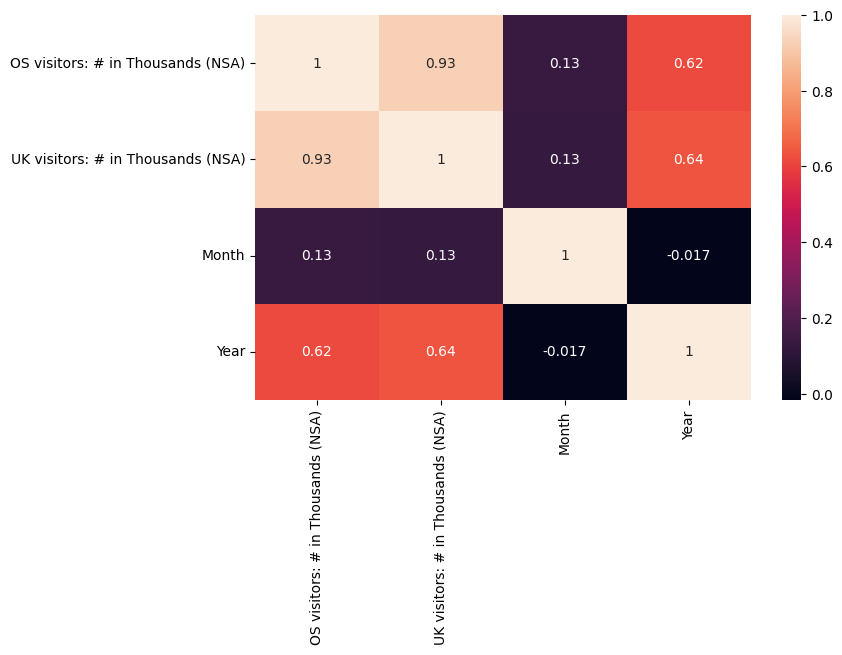

In [ ]:
## plot the heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_mat, annot=True)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 0.5006091794230818
MSE: 0.4882550223037762
RMSE: 0.6987524757049353
R2: 0.5282424068405287


## Decisiton Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_DTR = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_DTR)
print(f"Mean Squared Error: {mse}")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_DTR))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_DTR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_DTR)))
print('R2:', metrics.r2_score(y_test, y_pred_DTR))



Mean Squared Error: 0.08432896148771586
MAE: 0.19643653772271047
MSE: 0.08432896148771586
RMSE: 0.2903944928674025
R2: 0.918520391828492


## Random Forrest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=32, random_state=6) ## 3 , 40

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_RFR = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_RFR)
print(f"Mean Squared Error: {mse}")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_RFR))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_RFR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RFR)))
print('R2:', metrics.r2_score(y_test, y_pred_RFR))

Mean Squared Error: 0.05720632780736935
MAE: 0.15028426382426913
MSE: 0.05720632780736935
RMSE: 0.23917844344206557
R2: 0.9447265910495733


## Artifical Neural Network

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from utilities import create_sequences, get_scaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['OS visitors: # in Thousands (NSA)'] = scaler.fit_transform(df['OS visitors: # in Thousands (NSA)'].values.reshape(-1, 1))

# Create sequences and labels for training
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Define the sequence length (number of time steps to look back)
sequence_length = 2

# Create sequences and labels
X, y = create_sequences(df['OS visitors: # in Thousands (NSA)'].values, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], sequence_length, 1))
X_test = X_test.reshape((X_test.shape[0], sequence_length, 1))


# Build the LSTM model with dropout layers
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Add dropout layer to prevent overfitting
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')  # You can use different optimizers and loss functions based on your problem

# Train the model with model checkpoint for saving the best weights
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])


# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

# Save the entire model (architecture + weights)
model.save('complete_model.h5')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the predictions (e.g., using mean absolute error)
mae = np.mean(np.abs(predictions - y_test))
print(f'Mean Absolute Error: {mae}')


2023-12-01 15:26:23.829366: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-01 15:26:23.829388: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-01 15:26:23.829394: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-01 15:26:23.829423: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-01 15:26:23.829439: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/30


2023-12-01 15:26:25.504310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


 7/13 [===============>..............] - ETA: 0s - loss: 0.2244 
Epoch 1: val_loss improved from inf to 0.12881, saving model to best_model.h5
13/13 [==============================] - 5s 114ms/step - loss: 0.1877 - val_loss: 0.1288
Epoch 2/30
13/13 [==============================] - ETA: 0s - loss: 0.1090
Epoch 2: val_loss improved from 0.12881 to 0.06698, saving model to best_model.h5
13/13 [==============================] - 0s 13ms/step - loss: 0.1090 - val_loss: 0.0670
Epoch 3/30
13/13 [==============================] - ETA: 0s - loss: 0.0500
Epoch 3: val_loss improved from 0.06698 to 0.02832, saving model to best_model.h5
13/13 [==============================] - 0s 13ms/step - loss: 0.0500 - val_loss: 0.0283
Epoch 4/30
12/13 [==========================>...] - ETA: 0s - loss: 0.0214
Epoch 4: val_loss improved from 0.02832 to 0.01832, saving model to best_model.h5
13/13 [==============================] - 0s 13ms/step - loss: 0.0213 - val_loss: 0.0183
Epoch 5/30
 8/13 [===============

In [ ]:
y_test = y_test.flatten()
predictions = predictions.flatten()
y_test.shape, predictions.shape

((105,), (105,))

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

,Actual,Predicted
0,2977.0,2400.557373
1,963.0,1343.367065
2,1200.0,1807.560181
3,2909.0,2428.583252
4,1507.0,2033.450684
...,...,...
100,809.0,1201.511719
101,4155.0,3427.960449
102,3116.0,2690.280518
103,1764.0,2008.335693


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))

MAE: 374.73646182105654
MSE: 180790.86109799295
RMSE: 425.19508592879214
R2: 0.8069489448776377


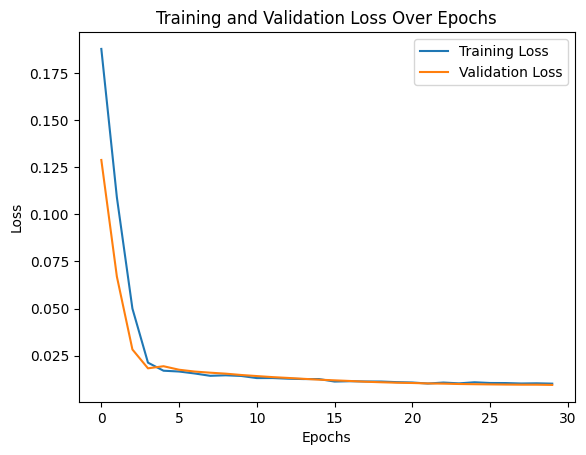

In [ ]:
# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()